# US Census - Data Cleanup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob as gb

files = gb.glob('data/states*.csv')
df_list = []
for file in files:
  data = pd.read_csv(file)
  df_list.append(data)
  
us_census = pd.concat(df_list).reset_index()
us_census.columns

Index(['index', 'Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [2]:
us_census.head()

,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,$49763.98772563177,2964003M_3081445F
1,1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F
2,2,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,$55916.469696969696,929606M_939759F
3,3,3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,$55526.525073746314,1407735M_1390901F
4,4,4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,$68728.8595890411,653484M_670717F


In [3]:
us_census.dtypes

index          int64
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [4]:
# use regex to turn 'income' collumn into numerical type
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census.Income)
# print(us_census)
us_census.dtypes

index           int64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object

In [5]:
# split the 'GenderPop' column and split into 'Men' and 'Women'
gender_split = us_census.GenderPop.str.split('_')
us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)
us_census.columns

Index(['index', 'Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men',
       'Women'],
      dtype='object')

In [6]:
# convert 'Men' and 'Women' into numerical datatypes
us_census.Men = us_census.Men.str.split('(\d+)', expand=True)[1]
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = us_census.Women.str.split('(\d+)', expand=True)[1]
us_census.Women = pd.to_numeric(us_census.Women)
print(us_census.dtypes)

index           int64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


In [7]:
us_census.head()

,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.987726,2964003M_3081445F,2964003,3081445.0
1,1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,47645.682836,510163M_F,510163,NaN
2,2,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,55916.469697,929606M_939759F,929606,939759.0
3,3,3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,55526.525074,1407735M_1390901F,1407735,1390901.0
4,4,4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,68728.859589,653484M_670717F,653484,670717.0


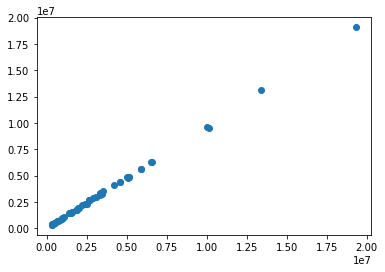

In [8]:
plt.scatter(us_census.Women, us_census.Men)
plt.show()

In [9]:
# calculate female pop based on total and male pop, fill in
us_census[['State', 'TotalPop', 'Men', 'Women']]

,State,TotalPop,Men,Women
0,Missouri,6045448,2964003,3081445.0
1,Montana,1014699,510163,NaN
2,Nebraska,1869365,929606,939759.0
3,Nevada,2798636,1407735,1390901.0
4,New Hampshire,1324201,653484,670717.0
5,New Jersey,8904413,4343027,4561386.0
6,Alabama,4830620,2341093,2489527.0
7,Alaska,733375,384160,349215.0
8,Arizona,6641928,3299088,3342840.0
9,Arkansas,2958208,1451913,1506295.0


In [10]:
# remove the duplicate rows

In [11]:
# plot the scatter plot again

In [12]:
# convert race columns into numerical values, remove any 'NaN' values(something sensible), check for duplicates

In [13]:
# plot a histogram for each one